In [1]:
import re # regex
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [35]:
train  = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [36]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [37]:
# combine train and test sets before cleaning up data
combined_data = train.append(test, ignore_index=True) # If ignore_index = True, the resulting axis will be labeled 0, 1, …, n - 1.

In [11]:
# create a function to remove unnecessary word in tweets eg: twitter handle starts with '@'
def remove_pattern(input, pattern):
    r = re.findall(pattern, input)
    for i in r:
        input = re.sub(i, '', input)
    return input

The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.

In [68]:
# remove twttier handles (@user) and create a new column for cleaned up tweets
combined_data['processed_tweet'] = np.vectorize(remove_pattern)(combined_data['tweet'], '@[\w]*')

The vectorized version of the function takes a sequence of objects or NumPy arrays as input and evaluates the Python function over each element of the input sequence. 

In [23]:
# example of using np.vectorize()
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)


array([3, 4, 1, 2])

In [173]:

combined_data.head()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49154    NaN
49155    NaN
49156    NaN
49157    NaN
49158    NaN
Name: label, Length: 49159, dtype: float64

In [71]:
# replace everything except normal characters and hashtags, with spaces
combined_data['processed_tweet'] = combined_data['processed_tweet'].str.replace("[^a-zA-Z#]", " ")

/var/folders/sn/nbftj_v52x59j9bmb21b_rfc0000gn/T/ipykernel_86954/2215306755.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data['processed_tweet'] = combined_data['processed_tweet'].str.replace("[^a-zA-Z#]", " ")


In [72]:
combined_data.head()

,id,label,tweet,processed_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [73]:
# remove short words: having 3 or less chars
combined_data['processed_tweet'] = combined_data['processed_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [74]:
combined_data.head()

,id,label,tweet,processed_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [75]:
# tokenization cleaned tweets (split a tweet into individual words aka tokens)
tokenized_tweet = combined_data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: processed_tweet, dtype: object

In [76]:
# stem each token aka strip suffixes such as 'ing', 'es', 'ly', 'er'
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: processed_tweet, dtype: object

In [77]:
# join tokens back together as a full tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined_data['processed_tweet'] = tokenized_tweet

In [78]:
combined_data

,id,label,tweet,processed_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


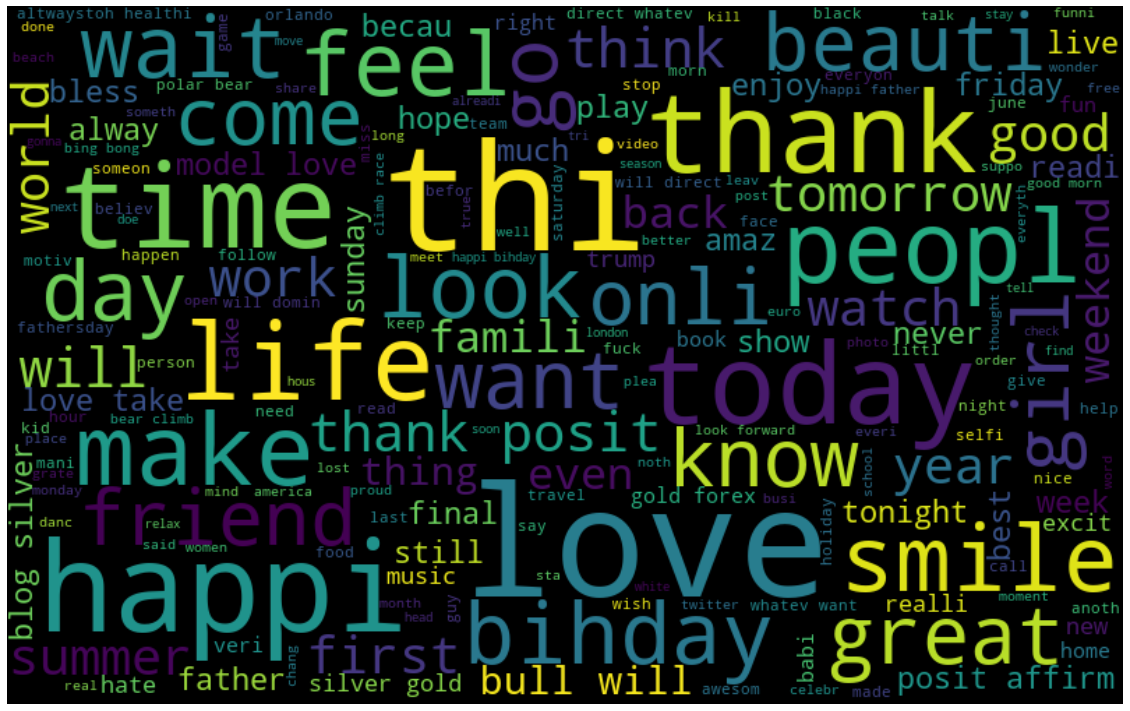

In [85]:
all_words = ' '.join([text for text in combined_data['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(20,70))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

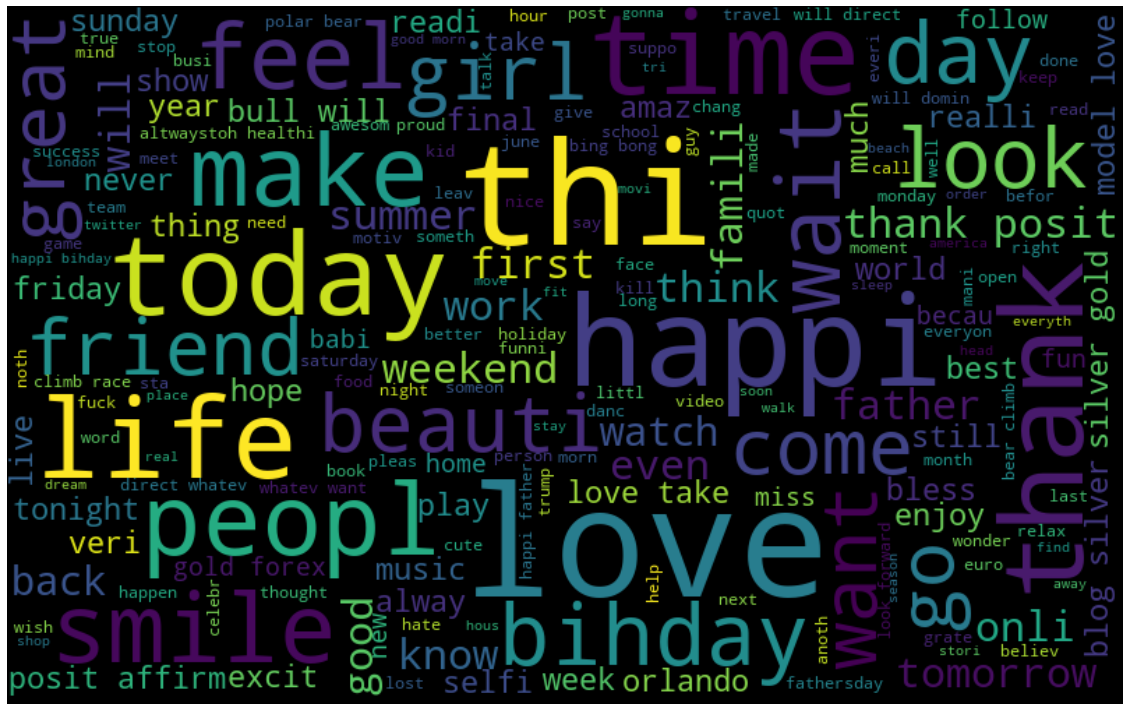

In [87]:
# filter out words that are not racist or sexist
normal_words = ' '.join([text for text in combined_data['processed_tweet'][combined_data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(20,70))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

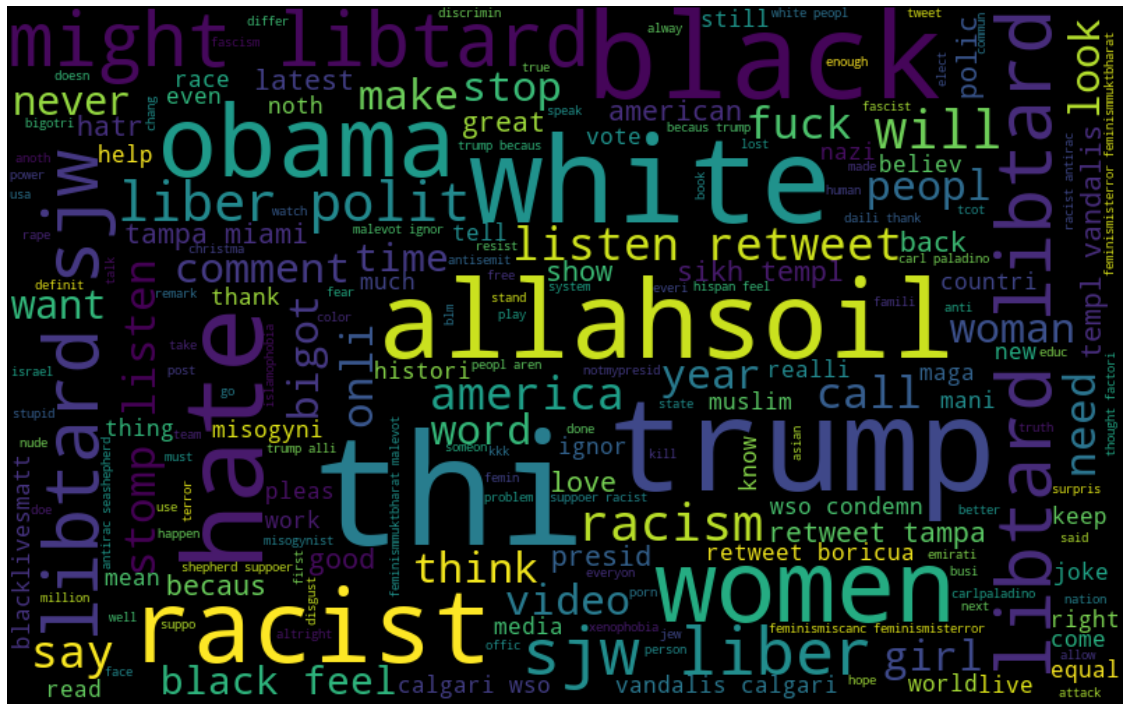

In [88]:
# filter out words that are racist or sexist
negative_words = ' '.join([text for text in combined_data['processed_tweet'][combined_data['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(20,70))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [104]:
# function to collect words
def hashtag_extract(tweet):
    hashtags = []

    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)

    return hashtags

normal_hashtags = hashtag_extract(combined_data['processed_tweet'][combined_data['label'] == 0])
negative_hashtags = hashtag_extract(combined_data['processed_tweet'][combined_data['label'] == 1])

# flatten lists
normal_hashtags = sum(normal_hashtags, [])
negative_hashtags = sum(negative_hashtags, [])

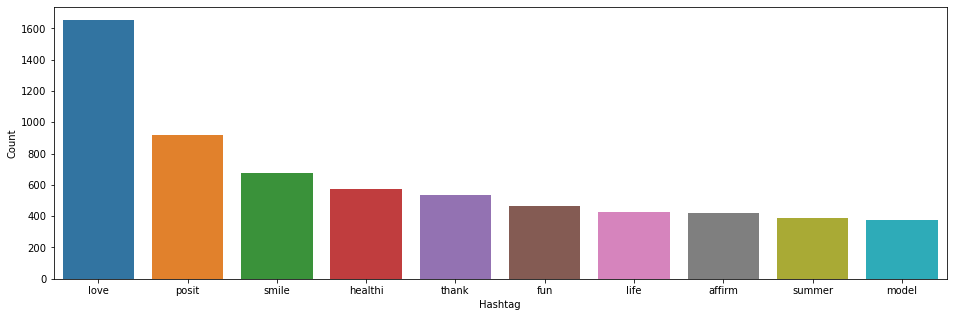

In [107]:
regular_tweet_frequency = nltk.FreqDist(normal_hashtags)
reg_data = pd.DataFrame({'Hashtag': list(regular_tweet_frequency.keys()), 'Count': list(regular_tweet_frequency.values())})
# get top 10 most frequent hashtags
reg_data = reg_data.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=reg_data, x='Hashtag', y='Count')
axis.set(ylabel='Count')
plt.show()

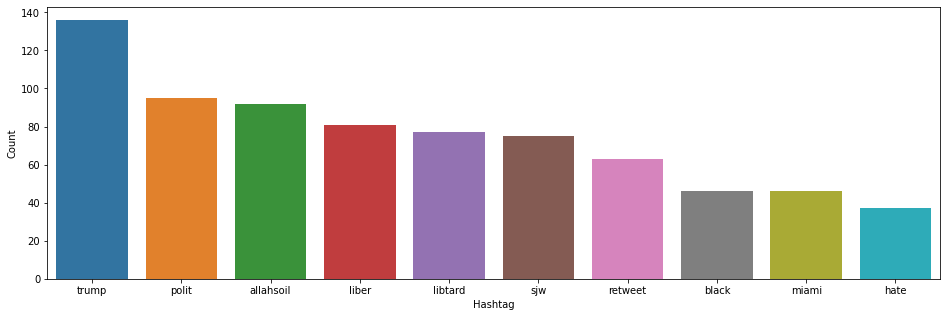

In [110]:
neg_tweet_frequency = nltk.FreqDist(negative_hashtags)
neg_data = pd.DataFrame({'Hashtag': list(neg_tweet_frequency.keys()), 'Count': list(neg_tweet_frequency.values())})
# get top 10 most frequent hashtags
neg_data = neg_data.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=neg_data, x='Hashtag', y='Count')
axis.set(ylabel='Count')
plt.show()

In [116]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=ENGLISH_STOP_WORDS)
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=ENGLISH_STOP_WORDS)
# bag of words feature matrix
bow = bow_vectorizer.fit_transform(combined_data['processed_tweet'])

# tf-idf feature matrix
tfidf = tfidf_vectorizer.fit_transform(combined_data['processed_tweet'])

In [156]:
# building model using BoW
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5303408146300915

In [160]:
# use model to predict test set
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('submission_logistic_regression_bow.csv', index=False) 


In [161]:
# build model using tfidf
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5451327433628319

In [199]:
from sklearn.pipeline import Pipeline
# define stages of sci-kit learn pipelines
pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)), ('model', LogisticRegression())])
# fit pipeline model with the training data
combined_data = combined_data.dropna()
pipeline.fit(combined_data['processed_tweet'], combined_data['label'])


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [207]:
text = [combined_data['processed_tweet'][combined_data['label'] == 1].iloc[50]]

# predict the label using pipeline
pipeline.predict(text)

array([1.])

In [208]:
from joblib import dump
# dump the pipeline model to a new file
dump(pipeline, filename='comprehensive_text_classification.joblib')

['comprehensive_text_classification.joblib']